In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_content = pd.read_csv('../data/feature/sentiws_content.csv')
df_comment = pd.read_csv('../data/feature/sentiws_comment.csv')
df_content_knn = pd.read_csv('../data/feature/knn_clustering.csv')

C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\1830982225.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_comment1 = df_comment1.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()


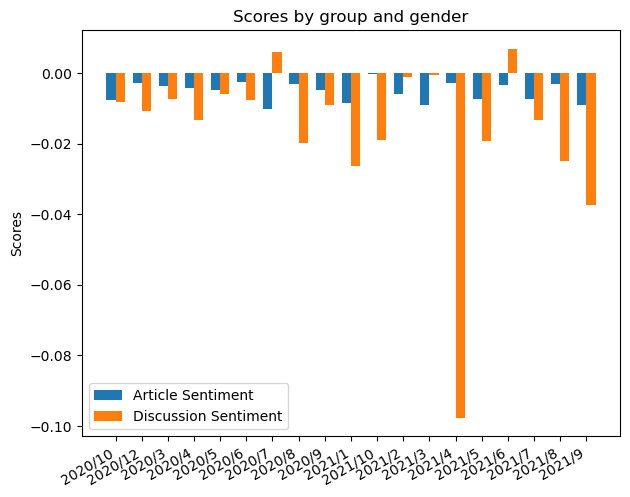

In [27]:
df_content['publishingDate'] = pd.to_datetime(df_content['publishingDate'])
df_comment1 = pd.merge(df_comment, df_content[['publishingDate','ID_GodotObject','sentiment_score']], on="ID_GodotObject")
# average comment sentiment in an article discussion
#df_comment1 = df_comment1.groupby(['ID_GodotObject', 'publishingDate'])['overal_sentiment'].mean().reset_index()


df_comment1['year'] = df_comment1['publishingDate'].dt.year
df_comment1['month'] = df_comment1['publishingDate'].dt.month
df_comment1['year/month'] = df_comment1['year'].astype(str) + '/' + df_comment1['month'].astype(str)

df_comment1 = df_comment1.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()

x = np.arange(len(df_comment1['year/month']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_comment1['sentiment_score'], width, label='Article Sentiment')
rects2 = ax.bar(x + width/2, df_comment1['overal_sentiment'], width, label='Discussion Sentiment')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, df_comment1['year/month'])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.show()


[0, 1, 2, 3]


C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\2061692394.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c = df_c.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()
C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\2061692394.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c = df_c.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()
C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\2061692394.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c = df_c.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()
C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\2061692394.py:21: FutureWarning: Indexing with multiple 

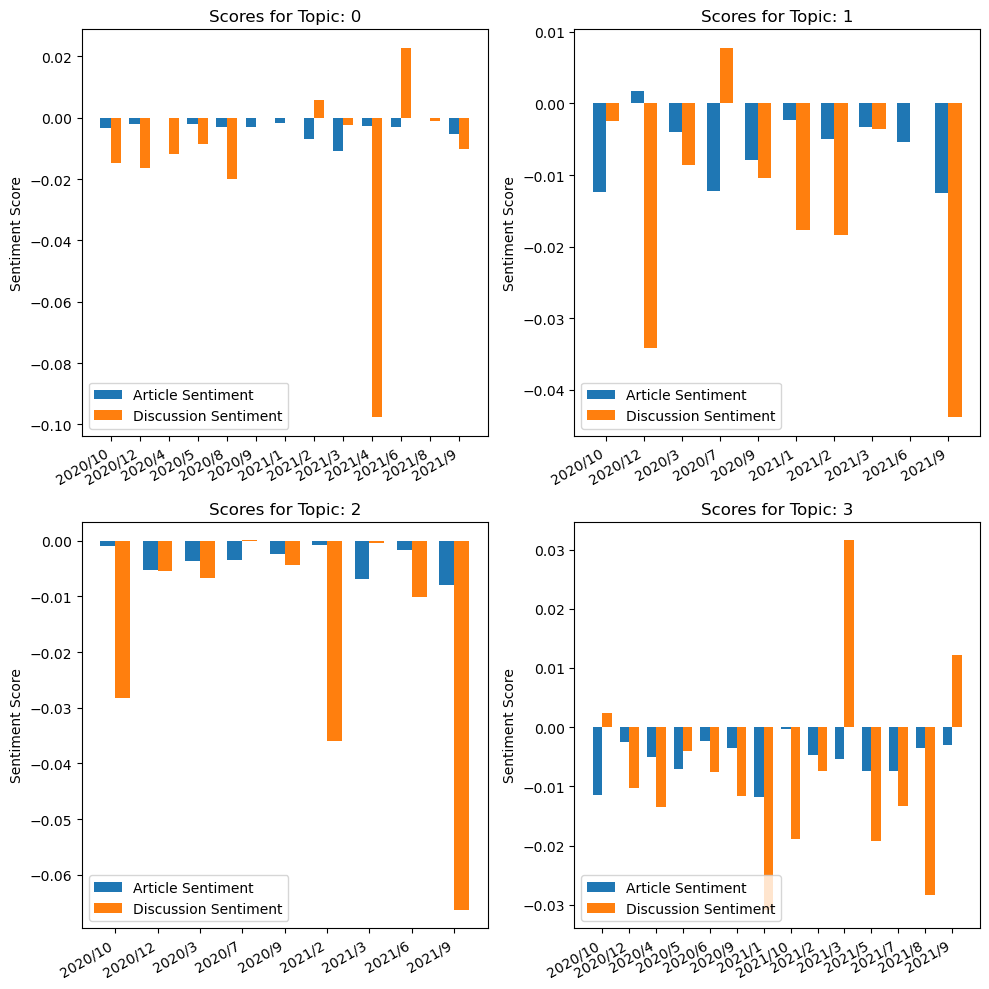

In [48]:
#Build sentiment plot for each cluster
clusters = [i for i in range(0,max(df_content_knn.cluster_value.values) + 1)]
print(clusters)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()

for i, ax in enumerate(axs):
    #check if ax index is cluster index
    if i not in clusters:
        continue;
    
    df_c = df_content_knn[df_content_knn['cluster_value'] == i]
    df_c = pd.merge(df_c, df_content[['publishingDate','ID_GodotObject','sentiment_score']],on="ID_GodotObject")
    df_c = pd.merge(df_c,df_comment ,on="ID_GodotObject")
    
    df_c['year'] = df_c['publishingDate'].dt.year
    df_c['month'] = df_c['publishingDate'].dt.month
    df_c['year/month'] = df_c['year'].astype(str) + '/' + df_c['month'].astype(str)
    #calculate mean for each period
    df_c = df_c.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()
    x = np.arange(len(df_c['year/month']))  # the label locations
    width = 0.35  # the width of the bars
    
    rects1 = ax.bar(x - width/2, df_c['sentiment_score'], width, label='Article Sentiment')
    rects2 = ax.bar(x + width/2, df_c['overal_sentiment'], width, label='Discussion Sentiment')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Sentiment Score')
    #axs[0].set_ylabel("avg. Sentiment Scores")  # set y-axis label for all subplots
    ax.set_title('Scores for Topic: ' + str(i))
    ax.set_xticks(x, df_c['year/month'], rotation=30, ha='right')
    ax.legend(loc='lower left')

    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)
    #plt.xticks(rotation=30, ha='right')
    
fig.tight_layout()
plt.show()

    



In [53]:
#see overall differences between article and comment sentiment
df_overall = pd.merge(df_comment, df_content[['publishingDate','ID_GodotObject','sentiment_score']], 
                      on="ID_GodotObject")
df_overall = pd.merge(df_overall, df_content_knn, on="ID_GodotObject")
df_overall = df_overall.groupby(['cluster_value'])['sentiment_score','overal_sentiment'].mean().reset_index()

x = np.arange(len(df_comment1['year/month']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_comment1['sentiment_score'], width, label='Article Sentiment')
rects2 = ax.bar(x + width/2, df_comment1['overal_sentiment'], width, label='Discussion Sentiment')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, df_comment1['year/month'])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.show()


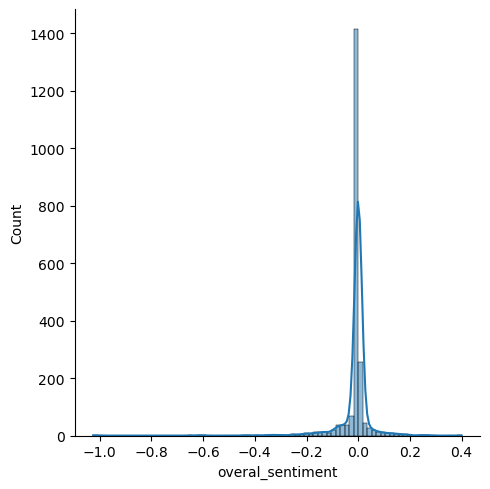

In [38]:
x = df_comment['overal_sentiment']
sns.displot(x, bins=82, kde=True);

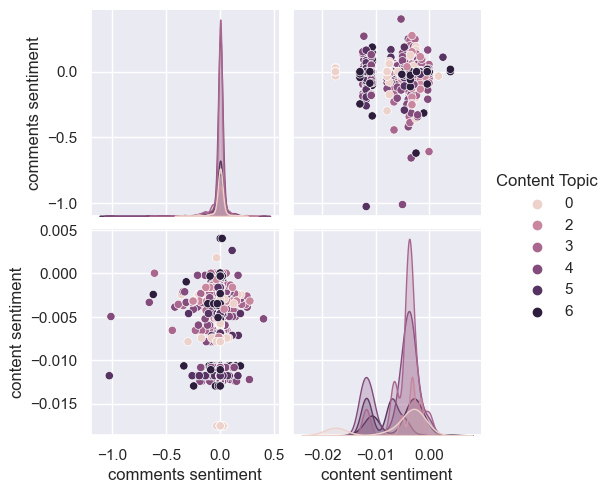

In [49]:
df_comment3 = pd.merge(df_comment, df_content_knn, on="ID_GodotObject")[["ID_GodotObject",'overal_sentiment','createdAt','cluster_value']]
df_comment3 = pd.merge(df_comment3, df_content[['sentiment_score','ID_GodotObject']],on="ID_GodotObject")
df_comment3.columns = ['ID_GodotObject', 'comments sentiment', 'createdAt', 'Content Topic',
       'content sentiment']

sns.set_theme()
sns.pairplot(df_comment3[['comments sentiment','content sentiment',  'Content Topic']], hue='Content Topic')